=== Simple Disease Prediction from Medical Data ===

1. Generating medical dataset...
Generated 1000 patient records
Features: ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose', 'Exercise_Hours', 'Smoking', 'Family_History']
Diseases: ['Healthy', 'Diabetes', 'Heart Disease', 'Hypertension']

Sample data:
   Age        BMI  Blood_Pressure  Cholesterol     Glucose  Exercise_Hours  \
0   58  22.248828      130.308661   218.954433  127.369002        1.180577   
1   59  22.095609      109.496604   177.144793   81.518343        1.487856   
2   61  23.744780      116.722658   140.946812  129.739619        8.176433   
3   28  21.996807      114.166125   175.931736  137.045564        0.260304   
4   55  27.830564      105.910931   144.882428   92.937667        1.677272   

   Smoking  Family_History       Disease  
0        0               0  Hypertension  
1        0               0       Healthy  
2        0               1      Diabetes  
3        0               0  Hypertension  
4 

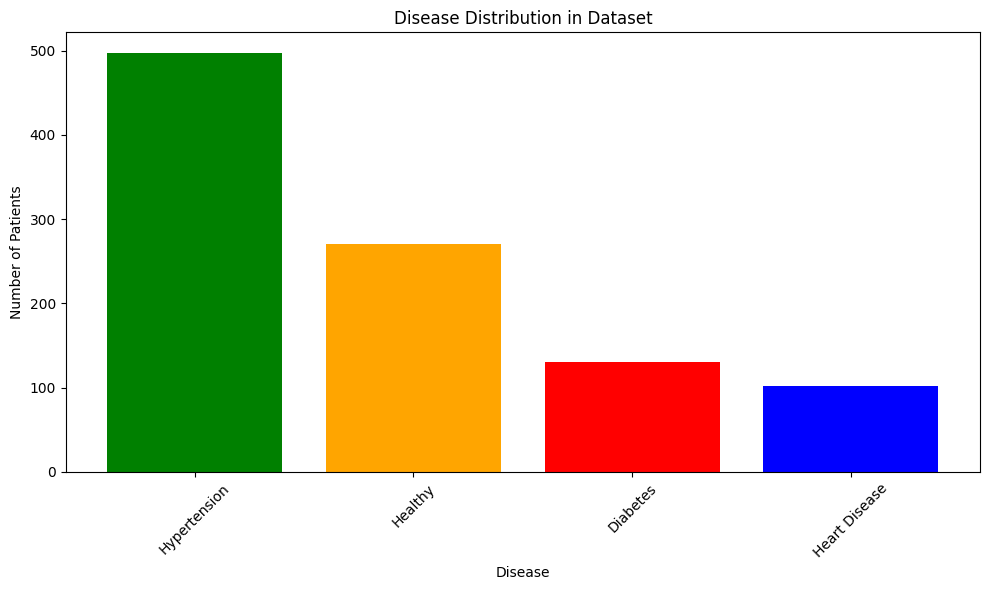

3. Preparing data...
Training: 800 patients, Testing: 200 patients

4. Training model...
Training disease prediction model...
Training completed!

5. Evaluating model...
Model Accuracy: 0.750

Classification Report:
               precision    recall  f1-score   support

     Diabetes       0.62      0.18      0.28        28
      Healthy       0.88      0.78      0.83        58
Heart Disease       0.83      0.36      0.50        14
 Hypertension       0.70      0.95      0.81       100

     accuracy                           0.75       200
    macro avg       0.76      0.57      0.60       200
 weighted avg       0.75      0.75      0.72       200


6. Feature importance analysis...


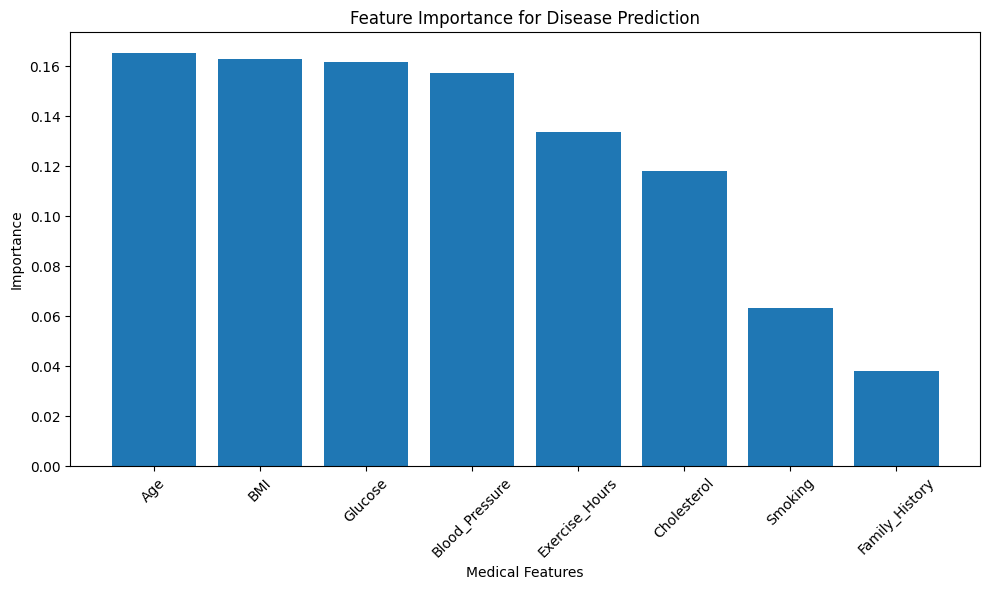


7. Testing with sample patients...

Patient 1 (High Risk Profile):
Age: 65, BMI: 32, BP: 150, Cholesterol: 260, Glucose: 140
Exercise: 0.5 hrs, Smoking: Yes, Family History: Yes
Predicted Disease: Heart Disease
Disease Probabilities:
  Healthy: 0.090
  Diabetes: 0.020
  Heart Disease: 0.870
  Hypertension: 0.020

Patient 2 (Low Risk Profile):
Age: 30, BMI: 22, BP: 110, Cholesterol: 180, Glucose: 85
Exercise: 5 hrs, Smoking: No, Family History: No
Predicted Disease: Healthy
Disease Probabilities:
  Healthy: 0.000
  Diabetes: 0.930
  Heart Disease: 0.020
  Hypertension: 0.050

Patient 3 (Moderate Risk Profile):
Age: 50, BMI: 28, BP: 135, Cholesterol: 220, Glucose: 110
Exercise: 2 hrs, Smoking: No, Family History: Yes
Predicted Disease: Hypertension
Disease Probabilities:
  Healthy: 0.080
  Diabetes: 0.060
  Heart Disease: 0.040
  Hypertension: 0.820

=== Disease Prediction Complete ===

=== Risk Assessment Example ===
Risk Level: Moderate Risk
Risk Factors: ['Overweight', 'Family histor

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

class SimpleDiseasePredictor:
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.diseases = ['Healthy', 'Diabetes', 'Heart Disease', 'Hypertension']
        
    def generate_medical_data(self, n_samples=1000):
        """Generate synthetic medical data"""
        np.random.seed(42)
        
        data = []
        labels = []
        
        for _ in range(n_samples):
            # Generate patient data
            age = np.random.randint(20, 80)
            bmi = np.random.normal(25, 5)
            blood_pressure = np.random.normal(120, 20)
            cholesterol = np.random.normal(200, 40)
            glucose = np.random.normal(100, 20)
            exercise_hours = np.random.exponential(2)
            smoking = np.random.choice([0, 1], p=[0.7, 0.3])  # 0=No, 1=Yes
            family_history = np.random.choice([0, 1], p=[0.6, 0.4])
            
            # Simple rules to assign diseases based on risk factors
            risk_score = 0
            
            # Age risk
            if age > 60: risk_score += 2
            elif age > 45: risk_score += 1
            
            # BMI risk
            if bmi > 30: risk_score += 2
            elif bmi > 25: risk_score += 1
            
            # Blood pressure risk
            if blood_pressure > 140: risk_score += 2
            elif blood_pressure > 130: risk_score += 1
            
            # Other risk factors
            if cholesterol > 240: risk_score += 1
            if glucose > 125: risk_score += 2
            if exercise_hours < 1: risk_score += 1
            if smoking: risk_score += 2
            if family_history: risk_score += 1
            
            # Assign disease based on risk score
            if risk_score <= 2:
                disease = 'Healthy'
            elif risk_score <= 4:
                disease = 'Hypertension'
            elif risk_score <= 6:
                if glucose > 125 or np.random.random() < 0.3:
                    disease = 'Diabetes'
                else:
                    disease = 'Hypertension'
            else:
                disease = 'Heart Disease'
            
            # Add some randomness
            if np.random.random() < 0.1:  # 10% random variation
                disease = np.random.choice(self.diseases)
            
            patient_data = [age, bmi, blood_pressure, cholesterol, glucose, 
                          exercise_hours, smoking, family_history]
            
            data.append(patient_data)
            labels.append(disease)
        
        columns = ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose', 
                  'Exercise_Hours', 'Smoking', 'Family_History']
        
        df = pd.DataFrame(data, columns=columns)
        df['Disease'] = labels
        
        return df
    
    def train(self, X, y):
        """Train the disease prediction model"""
        print("Training disease prediction model...")
        self.model.fit(X, y)
        print("Training completed!")
    
    def predict(self, X):
        """Predict disease from patient data"""
        return self.model.predict(X)
    
    def predict_proba(self, X):
        """Get prediction probabilities"""
        return self.model.predict_proba(X)
    
    def evaluate(self, X_test, y_test):
        """Evaluate model performance"""
        predictions = self.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        
        print(f"Model Accuracy: {accuracy:.3f}")
        print("\nClassification Report:")
        print(classification_report(y_test, predictions))
        
        return accuracy, predictions
    
    def predict_patient_disease(self, patient_data):
        """Predict disease for a single patient"""
        patient_array = np.array(patient_data).reshape(1, -1)
        
        disease = self.predict(patient_array)[0]
        probabilities = self.predict_proba(patient_array)[0]
        
        # Create probability dictionary
        disease_probs = dict(zip(self.diseases, probabilities))
        
        return disease, disease_probs
    
    def plot_disease_distribution(self, df):
        """Plot disease distribution in dataset"""
        plt.figure(figsize=(10, 6))
        disease_counts = df['Disease'].value_counts()
        plt.bar(disease_counts.index, disease_counts.values, color=['green', 'orange', 'red', 'blue'])
        plt.title('Disease Distribution in Dataset')
        plt.xlabel('Disease')
        plt.ylabel('Number of Patients')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def plot_feature_importance(self, feature_names):
        """Plot feature importance"""
        importances = self.model.feature_importances_
        
        plt.figure(figsize=(10, 6))
        indices = np.argsort(importances)[::-1]
        
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
        plt.title('Feature Importance for Disease Prediction')
        plt.xlabel('Medical Features')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()

def main():
    """Main function to run disease prediction"""
    print("=== Simple Disease Prediction from Medical Data ===\n")
    
    # Initialize predictor
    predictor = SimpleDiseasePredictor()
    
    # Step 1: Generate medical data
    print("1. Generating medical dataset...")
    df = predictor.generate_medical_data(1000)
    print(f"Generated {len(df)} patient records")
    print(f"Features: {list(df.columns[:-1])}")
    print(f"Diseases: {predictor.diseases}")
    
    # Show data sample
    print("\nSample data:")
    print(df.head())
    
    # Step 2: Plot disease distribution
    print("\n2. Analyzing disease distribution...")
    predictor.plot_disease_distribution(df)
    
    # Step 3: Prepare data for training
    print("3. Preparing data...")
    X = df.drop('Disease', axis=1)
    y = df['Disease']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training: {len(X_train)} patients, Testing: {len(X_test)} patients")
    
    # Step 4: Train model
    print("\n4. Training model...")
    predictor.train(X_train, y_train)
    
    # Step 5: Evaluate model
    print("\n5. Evaluating model...")
    accuracy, predictions = predictor.evaluate(X_test, y_test)
    
    # Step 6: Show feature importance
    print("\n6. Feature importance analysis...")
    predictor.plot_feature_importance(X.columns)
    
    # Step 7: Test with sample patients
    print("\n7. Testing with sample patients...")
    
    # Test patient 1: High risk
    patient1 = [65, 32, 150, 260, 140, 0.5, 1, 1]  # Age, BMI, BP, Chol, Glucose, Exercise, Smoking, Family_History
    disease1, probs1 = predictor.predict_patient_disease(patient1)
    
    print("\nPatient 1 (High Risk Profile):")
    print(f"Age: 65, BMI: 32, BP: 150, Cholesterol: 260, Glucose: 140")
    print(f"Exercise: 0.5 hrs, Smoking: Yes, Family History: Yes")
    print(f"Predicted Disease: {disease1}")
    print("Disease Probabilities:")
    for disease, prob in probs1.items():
        print(f"  {disease}: {prob:.3f}")
    
    # Test patient 2: Low risk
    patient2 = [30, 22, 110, 180, 85, 5, 0, 0]
    disease2, probs2 = predictor.predict_patient_disease(patient2)
    
    print("\nPatient 2 (Low Risk Profile):")
    print(f"Age: 30, BMI: 22, BP: 110, Cholesterol: 180, Glucose: 85")
    print(f"Exercise: 5 hrs, Smoking: No, Family History: No")
    print(f"Predicted Disease: {disease2}")
    print("Disease Probabilities:")
    for disease, prob in probs2.items():
        print(f"  {disease}: {prob:.3f}")
    
    # Test patient 3: Moderate risk
    patient3 = [50, 28, 135, 220, 110, 2, 0, 1]
    disease3, probs3 = predictor.predict_patient_disease(patient3)
    
    print("\nPatient 3 (Moderate Risk Profile):")
    print(f"Age: 50, BMI: 28, BP: 135, Cholesterol: 220, Glucose: 110")
    print(f"Exercise: 2 hrs, Smoking: No, Family History: Yes")
    print(f"Predicted Disease: {disease3}")
    print("Disease Probabilities:")
    for disease, prob in probs3.items():
        print(f"  {disease}: {prob:.3f}")
    
    print("\n=== Disease Prediction Complete ===")
    return predictor, df

# Risk assessment function
def assess_patient_risk(patient_data):
    """Simple risk assessment based on medical guidelines"""
    age, bmi, bp, chol, glucose, exercise, smoking, family_history = patient_data
    
    risk_factors = []
    
    if age > 60: risk_factors.append("Advanced age")
    if bmi > 30: risk_factors.append("Obesity")
    elif bmi > 25: risk_factors.append("Overweight")
    if bp > 140: risk_factors.append("High blood pressure")
    if chol > 240: risk_factors.append("High cholesterol")
    if glucose > 125: risk_factors.append("High glucose")
    if exercise < 2: risk_factors.append("Low physical activity")
    if smoking: risk_factors.append("Smoking")
    if family_history: risk_factors.append("Family history")
    
    if not risk_factors:
        return "Low Risk", risk_factors
    elif len(risk_factors) <= 2:
        return "Moderate Risk", risk_factors
    else:
        return "High Risk", risk_factors

# Run the main function
if __name__ == "__main__":
    predictor, df = main()
    
    # Example risk assessment
    print("\n=== Risk Assessment Example ===")
    patient_example = [45, 27, 125, 200, 95, 3, 0, 1]
    risk_level, factors = assess_patient_risk(patient_example)
    print(f"Risk Level: {risk_level}")
    print(f"Risk Factors: {factors if factors else 'None identified'}")